# SVM in Python

In [19]:
# load packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [20]:
# read in data
df = pd.read_csv('/Users/brianwimmer/anly-501-project-brianwimmer-gu/data/March_2020_VA_Flights.csv')

In [21]:
# Data Cleaning
# remove unnecessary columns
df = df.drop(['ACTUAL_ELAPSED_TIME', 'FL_DATE', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_CITY_NAME', 'DEST_STATE_ABR'], axis=1)

# filter out only IAD flights
df = df[df['ORIGIN'] == "IAD"]

# filter out only legacy carrier flights (UA, DL, AA)
carriers = ["UA","DL", "AA"]
df = df[df["OP_CARRIER"].isin(carriers)]

# dummy variables for destination and origin
df = pd.get_dummies(df, columns=['DEST', 'ORIGIN'])

In [22]:
# Split the dataframe into X and y and then split X and y into train and test sets.
from sklearn.model_selection import train_test_split
X = df.drop('OP_CARRIER', axis = 1)
y = df['OP_CARRIER']

# normalizing data
scaler = StandardScaler()
X = X.to_numpy()
X[:,:-1] = scaler.fit_transform(X[:,:-1])

test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state= 0)

In [23]:
# Show the shape of the train and test sets, and levels of the depencent variable (Y) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(df['OP_CARRIER'].value_counts())

(2326, 50)
(582, 50)
(2326,)
(582,)
UA    2465
DL     263
AA     180
Name: OP_CARRIER, dtype: int64


In [24]:
# Import svc from sklearn.svm and classsification_report, confusion_matrix from sklearn.metrics.
# Fit the classfier on the training data and predict on the test data. 
# Set the classifier to be linear and C between 0.35-0.75. 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

clf = SVC(C = 0.5, kernel = 'rbf')
model = clf.fit(X_train, y_train)
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)

In [25]:
# Calculate the confusion matrix and classification report for the train and test data. 
print('Confusion Matrix for Train Data')
print(confusion_matrix(y_train, yp_train))
print("--------------------------------")
print('Confusion Matrix for Test Data')
print(confusion_matrix(y_test, yp_test))

Confusion Matrix for Train Data
[[ 127    0   25]
 [   0  192   23]
 [   0   20 1939]]
--------------------------------
Confusion Matrix for Test Data
[[ 22   0   6]
 [  0  44   4]
 [  0   8 498]]


In [26]:
print("Classification Report for Train Data")
print(classification_report(y_train, yp_train))
print("--------------------------------")
print("Classification Report for Test Data")
print(classification_report(y_test, yp_test))

Classification Report for Train Data
              precision    recall  f1-score   support

          AA       1.00      0.84      0.91       152
          DL       0.91      0.89      0.90       215
          UA       0.98      0.99      0.98      1959

    accuracy                           0.97      2326
   macro avg       0.96      0.91      0.93      2326
weighted avg       0.97      0.97      0.97      2326

--------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

          AA       1.00      0.79      0.88        28
          DL       0.85      0.92      0.88        48
          UA       0.98      0.98      0.98       506

    accuracy                           0.97       582
   macro avg       0.94      0.90      0.91       582
weighted avg       0.97      0.97      0.97       582



In [27]:
# Save the results in a data frame.
# save as dictionary
cr_train = classification_report(y_train, yp_train, output_dict = True)
cr_test = classification_report(y_test, yp_test, output_dict = True)

# convert to df
cr_train_df = pd.DataFrame.from_dict(cr_train)
cr_test_df = pd.DataFrame.from_dict(cr_test)

cr_train_df = pd.DataFrame.transpose(cr_train_df)
cr_test_df = pd.DataFrame.transpose(cr_test_df)

In [28]:
# display the results data frame
print("Classification Report DF for Train Data")
print(cr_train_df)
print("--------------------------------")
print("Classification Report DF for Test Data")
print(cr_test_df)

Classification Report DF for Train Data
              precision    recall  f1-score      support
AA             1.000000  0.835526  0.910394   152.000000
DL             0.905660  0.893023  0.899297   215.000000
UA             0.975843  0.989791  0.982767  1959.000000
accuracy       0.970765  0.970765  0.970765     0.970765
macro avg      0.960501  0.906113  0.930820  2326.000000
weighted avg   0.970934  0.970765  0.970322  2326.000000
--------------------------------
Classification Report DF for Test Data
              precision    recall  f1-score     support
AA             1.000000  0.785714  0.880000   28.000000
DL             0.846154  0.916667  0.880000   48.000000
UA             0.980315  0.984190  0.982249  506.000000
accuracy       0.969072  0.969072  0.969072    0.969072
macro avg      0.942156  0.895524  0.914083  582.000000
weighted avg   0.970197  0.969072  0.968896  582.000000


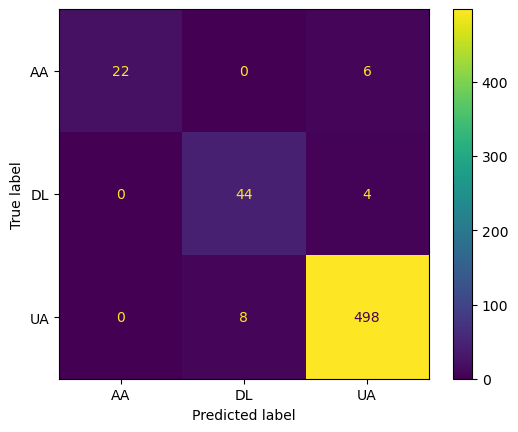

In [29]:
# Display Confusion Matrix for the test data
ConfusionMatrixDisplay.from_predictions(y_test, yp_test)